<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#quick-start" data-toc-modified-id="quick-start-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>quick start</a></span><ul class="toc-item"><li><span><a href="#Resources" data-toc-modified-id="Resources-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Resources</a></span></li></ul></li><li><span><a href="#FULL-MODEL" data-toc-modified-id="FULL-MODEL-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>FULL MODEL</a></span><ul class="toc-item"><li><span><a href="#Packages" data-toc-modified-id="Packages-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Packages</a></span><ul class="toc-item"><li><span><a href="#Qnetwork" data-toc-modified-id="Qnetwork-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Qnetwork</a></span></li></ul></li><li><span><a href="#POMDP-RNN-Game" data-toc-modified-id="POMDP-RNN-Game-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>POMDP RNN Game</a></span></li><li><span><a href="#Results" data-toc-modified-id="Results-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Results</a></span><ul class="toc-item"><li><span><a href="#Standard-setting：-grid-=--(3,7)，-holes-=-0" data-toc-modified-id="Standard-setting：-grid-=--(3,7)，-holes-=-0-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Standard setting： grid =  (3,7)， holes = 0</a></span></li><li><span><a href="#Model-Tranining" data-toc-modified-id="Model-Tranining-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Model Tranining</a></span></li><li><span><a href="#decoding-vs-performance" data-toc-modified-id="decoding-vs-performance-2.3.3"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>decoding vs performance</a></span></li><li><span><a href="#learning-rate-vs-performance" data-toc-modified-id="learning-rate-vs-performance-2.3.4"><span class="toc-item-num">2.3.4&nbsp;&nbsp;</span>learning rate vs performance</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-2.3.5"><span class="toc-item-num">2.3.5&nbsp;&nbsp;</span>Summary</a></span></li><li><span><a href="#Anlytic-part-,-check-the-behaviour-correspond-to-each-decoding-level-and-explain-why" data-toc-modified-id="Anlytic-part-,-check-the-behaviour-correspond-to-each-decoding-level-and-explain-why-2.3.6"><span class="toc-item-num">2.3.6&nbsp;&nbsp;</span>Anlytic part , check the behaviour correspond to each decoding level and explain why</a></span></li></ul></li><li><span><a href="#PCA" data-toc-modified-id="PCA-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>PCA</a></span></li></ul></li></ul></div>

# quick start 

**This study tries to loop upon each strategy on its own decoding/navigation performance**

**Somethings to study**:
1.  Take the overall statistics of results, compare what is qualitative change between echo state and pretrained network
2.  Take the best generalized case, extract the features, PCs, used limit cyles, and spatial representation level, compared with other cases. 
3.  Do the q learning slope(first 5 avarge - last 5 average in 15?) vsus performance(35, 85) and put them in a plot, firstly can choose all echo state ones, and best strategies, then actually take all networks

## Resources

* [*The* Reinforcement learning book from Sutton & Barto](http://incompleteideas.net/sutton/book/the-book-2nd.html)
* [The REINFORCE paper from Ronald J. Williams (1992)](http://www-anw.cs.umass.edu/~barto/courses/cs687/williams92simple.pdf)


# FULL MODEL

## Packages

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
from itertools import count
import random

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.autograd as autograd
from torch.autograd import Variable
from torch.nn import init
from torch.nn import DataParallel
from torch.utils.data import DataLoader

import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.animation
import seaborn as sns
from IPython.display import HTML

import pretrain
from pretrain import *

import navigation2
from navigation2 import *

import sklearn
from sklearn.svm import SVC

import scipy
from scipy.spatial import distance
from scipy import signal

import Nets
from Nets import*

%pylab inline
import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


/home/cruiser/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## receptive field

In [2]:
# parameters
k_action , k_internal, k_stim = 1, 1, 1
threshold = 0.9
# Count on activity random
activity = ActivityCheck(size = 15, num_pc = 6, k_action = k_action, k_internal = k_internal, k_stim = k_stim, threshold = threshold)
for iters in range (30000):
    if iters%500 == 0:
        activity.activity(weight = 'weights_cpu1/rnn_1515tanh512_checkpoint300', noise = 1, reward_control = 1)
        np.save('activity_15/grid__300r.npy', activity.Grid)
        np.save('activity_15/visit_300r.npy', activity.Visit)
        np.save('activity_15/grid_shuffle_300r.npy', activity.Grid_shuffle)
        np.save('activity_15/visit_shuffle_300r.npy', activity.Visit_shuffle)
        print (np.sum(activity.Visit))

25619.00361
51211.00361
76957.00361
102613.00361
128277.00361
153985.00361
179661.00361
205312.00361
230999.00361
256684.00361
282427.00361
308019.00361
333739.00361
359384.00361
385038.00361
410663.00361
436348.00361
461959.00361
487578.00361
513322.00361
538877.00361
564530.00361
590112.00361
615760.00361
641428.00361
667191.00361
692872.00361
718552.00361
744171.00361
769882.00361
795593.00361
821125.00361
846861.00361
872481.00361
898150.00361
923916.00361
949535.00361
975118.00361
1000764.00361
1026465.00361
1052093.00361
1077894.00361
1103535.00361
1129327.00361
1155010.00361
1180609.00361
1206377.00361
1232075.00361
1257801.00361
1283443.00361
1309141.00361
1334853.00361
1360523.00361
1386424.00361
1412069.00361
1437896.00361
1463521.00361
1489167.00361
1514899.00361
1540643.00361


In [11]:
# parameters
k_action , k_internal, k_stim = 1, 1, 1
threshold = 0.9
# Count on activity random
activity = ActivityCheck(size = 15, num_pc = 6, k_action = k_action, k_internal = k_internal, k_stim = k_stim, threshold = threshold)
for iters in range (30000):
    if iters%500 == 0:
        activity.activity(weight = 'weights_fix1/rnn_1515tanh512_checkpoint300_0_5', noise = 0.2, reward_control = 1)
        np.save('activity_15q/grid__300r.npy', activity.Grid)
        np.save('activity_15q/visit_300r.npy', activity.Visit)
        np.save('activity_15q/grid_shuffle_300r.npy', activity.Grid_shuffle)
        np.save('activity_15q/visit_shuffle_300r.npy', activity.Visit_shuffle)
        print (np.sum(activity.Visit))

26885.00361
53770.00361
80668.00361
107545.00361
134430.00361
161316.00361
188194.00361
215084.00361
241965.00361
268858.00361
295732.00361
322603.00361
349496.00361
376372.00361
403258.00361
430137.00361
457019.00361
483888.00361
510771.00361
537650.00361
564532.00361
591435.00361
618312.00361
645186.00361
672055.00361
698931.00361
725816.00361
752677.00361
779563.00361
806450.00361
833318.00361
860201.00361
887084.00361
913979.00361
940871.00361
967753.00361
994649.00361
1021529.00361
1048429.00361
1075303.00361
1102163.00361
1129042.00361
1155931.00361
1182816.00361
1209703.00361
1236580.00361
1263445.00361
1290329.00361
1317213.00361
1344095.00361
1370978.00361
1397872.00361
1424759.00361
1451655.00361
1478546.00361
1505407.00361
1532300.00361
1559183.00361
1586070.00361
1612978.00361


In [14]:
# parameters
k_action , k_internal, k_stim = 1, 1, 1
threshold = 0.9
# Count on activity random
activity = ActivityCheck(size = 15, num_pc = 6, k_action = k_action, k_internal = k_internal, k_stim = k_stim, threshold = threshold)
for iters in range (30000):
    if iters%500 == 0:
        activity.activity(weight = 'weights_fix1/rnn_1515tanh512_checkpoint300_0_5', noise = 0.2, reward_control = 0)
        np.save('activity_15q/grid__300l.npy', activity.Grid)
        np.save('activity_15q/visit_300l.npy', activity.Visit)
        np.save('activity_15q/grid_shuffle_300l.npy', activity.Grid_shuffle)
        np.save('activity_15q/visit_shuffle_300l.npy', activity.Visit_shuffle)
        print (np.sum(activity.Visit))

26907.00361
53807.00361
80712.00361
107610.00361
134501.00361
161408.00361
188317.00361
215220.00361
242117.00361
269027.00361
295926.00361
322843.00361
349742.00361
376650.00361
403545.00361
430441.00361
457340.00361
484248.00361
511148.00361
538058.00361
564973.00361
591879.00361
618771.00361
645683.00361
672577.00361
699465.00361
726371.00361
753266.00361
780166.00361
807062.00361
833968.00361
860858.00361
887772.00361
914664.00361
941557.00361
968448.00361
995361.00361
1022266.00361
1049170.00361
1076071.00361
1102989.00361
1129888.00361
1156782.00361
1183669.00361
1210556.00361
1237477.00361
1264360.00361
1291271.00361
1318144.00361
1345050.00361
1371970.00361
1398875.00361
1425774.00361
1452665.00361
1479569.00361
1506476.00361
1533360.00361
1560258.00361
1587148.00361
1614080.00361


## show receptive field

explain grid cell?

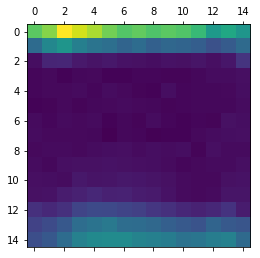

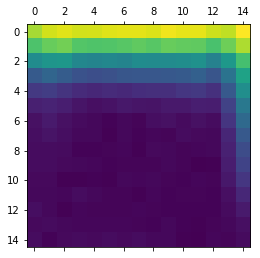

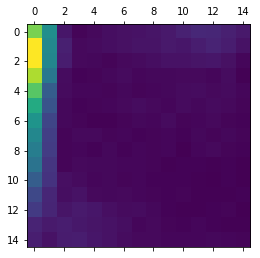

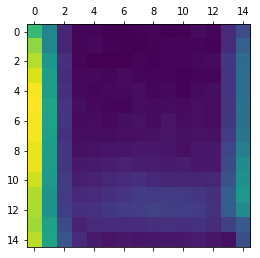

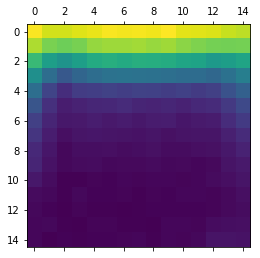

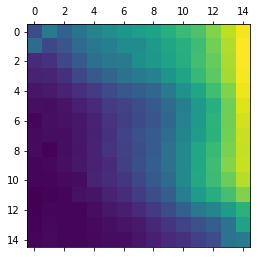

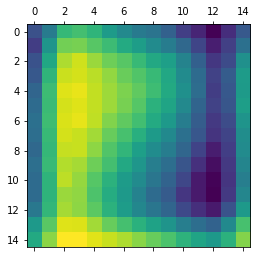

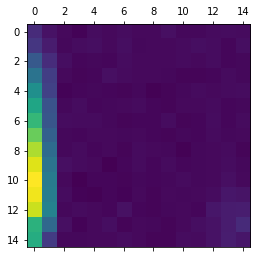

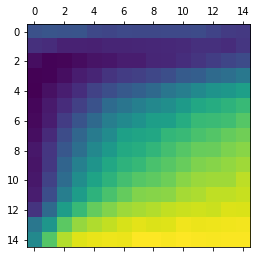

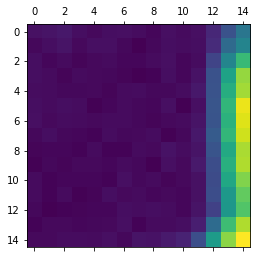

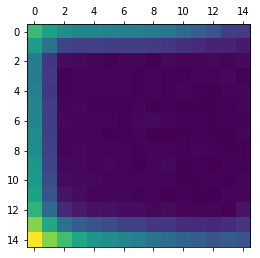

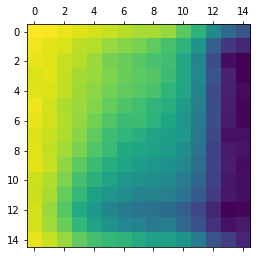

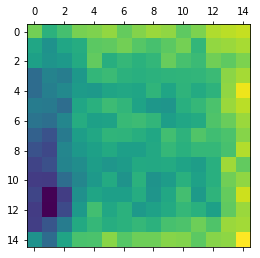

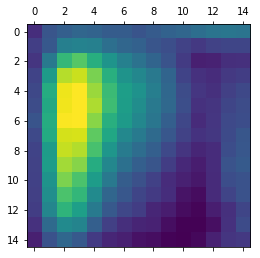

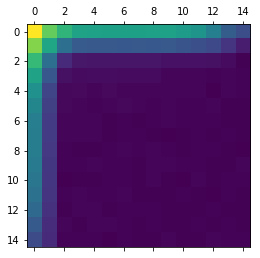

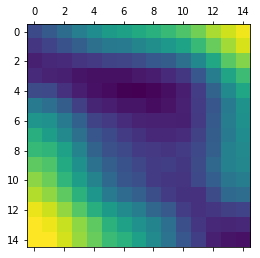

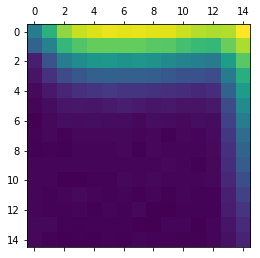

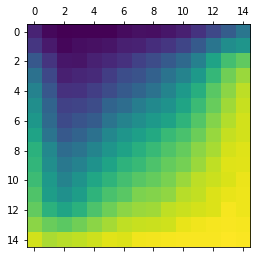

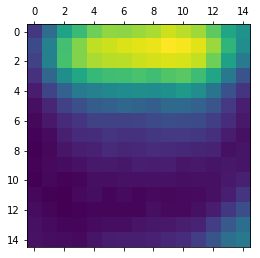

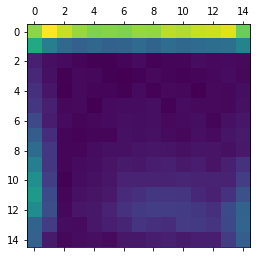

In [17]:
# The single cell receptive field
Grid = np.load('activity_15/grid__300r.npy')
Grid_shuffle = np.load('activity_15/grid_shuffle_300r.npy')
Visit = np.load('activity_15/visit_300r.npy')
Visit_shuffle = np.load('activity_15/visit_shuffle_300r.npy')
for i in range(70, 90):
    dif = Grid[i]/Visit - Grid_shuffle[i]/Visit_shuffle
    plt.matshow(dif[2:17, 2:17])
#     plt.colorbar()

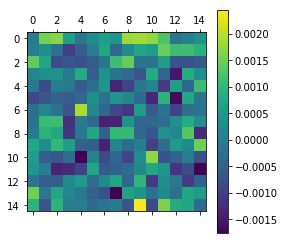

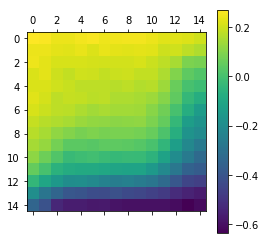

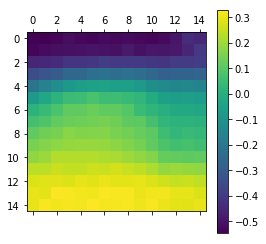

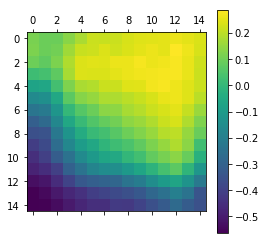

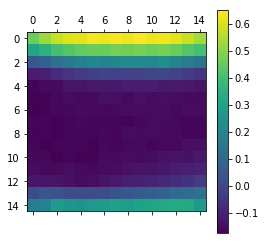

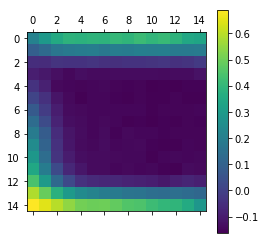

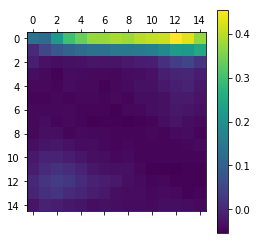

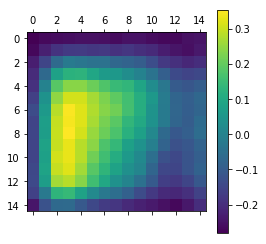

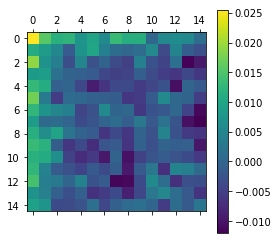

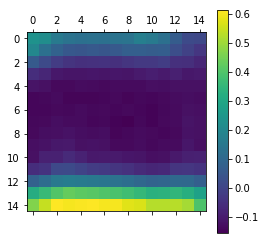

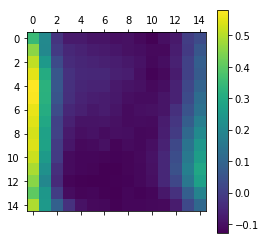

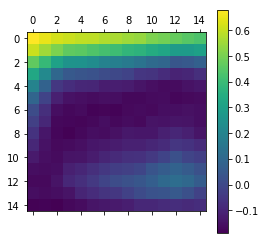

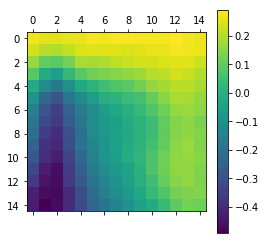

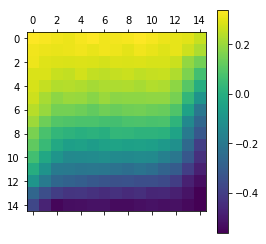

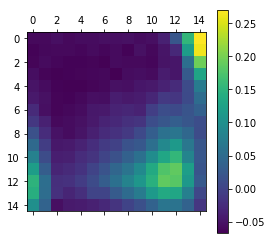

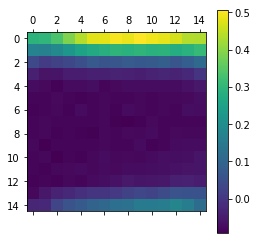

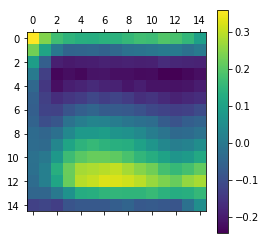

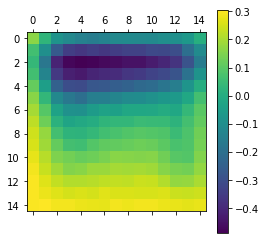

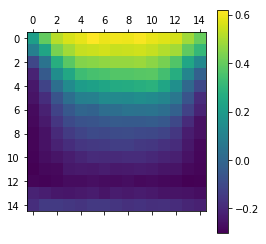

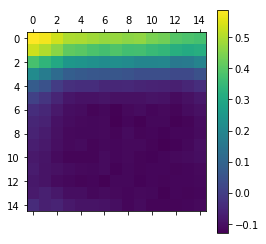

In [9]:
# The single cell receptive field
Grid = np.load('activity_15/grid__300r.npy')
Grid_shuffle = np.load('activity_15/grid_shuffle_300r.npy')
Visit = np.load('activity_15/visit_300r.npy')
Visit_shuffle = np.load('activity_15/visit_shuffle_300r.npy')
for i in range(90, 110):
    dif = Grid[i]/Visit - Grid_shuffle[i]/Visit_shuffle
    plt.matshow(dif[2:17, 2:17])
#     plt.colorbar()

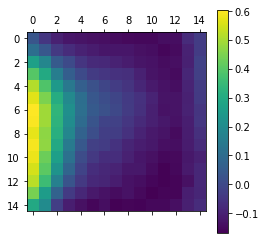

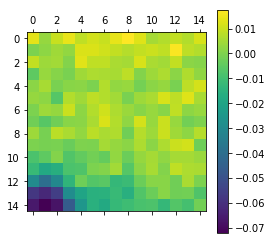

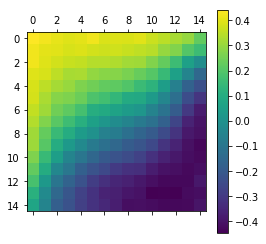

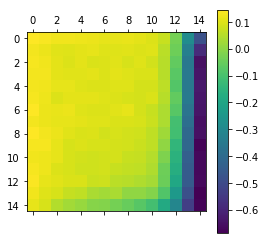

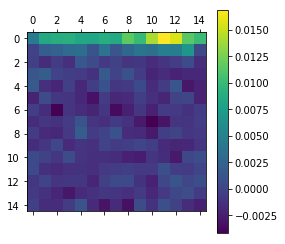

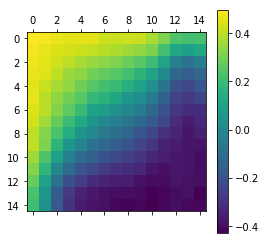

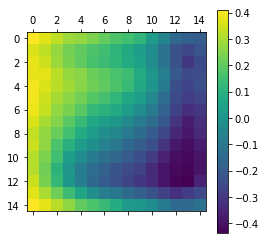

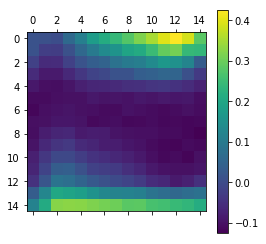

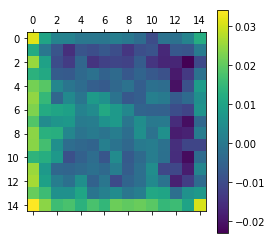

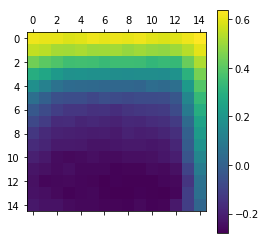

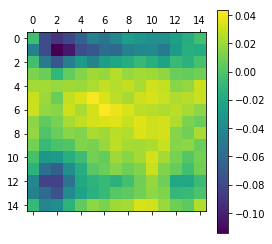

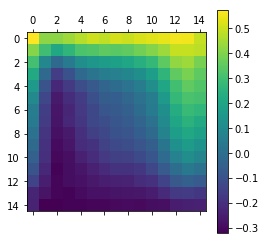

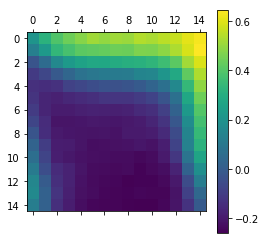

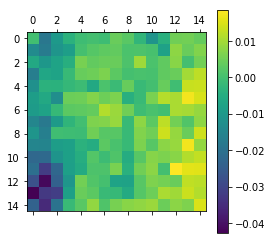

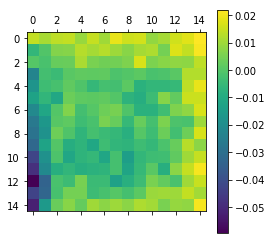

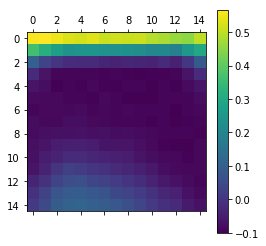

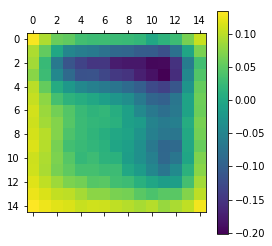

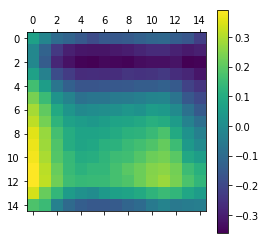

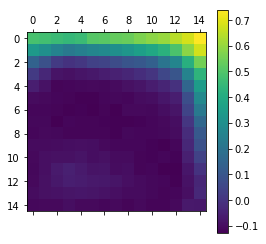

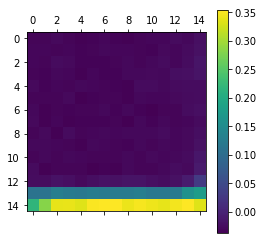

In [10]:
# The single cell receptive field
Grid = np.load('activity_15/grid__300r.npy')
Grid_shuffle = np.load('activity_15/grid_shuffle_300r.npy')
Visit = np.load('activity_15/visit_300r.npy')
Visit_shuffle = np.load('activity_15/visit_shuffle_300r.npy')
for i in range(130, 150):
    dif = Grid[i]/Visit - Grid_shuffle[i]/Visit_shuffle
    plt.matshow(dif[2:17, 2:17])
    plt.colorbar()

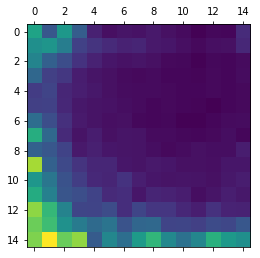

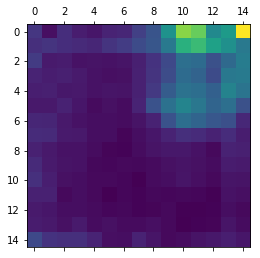

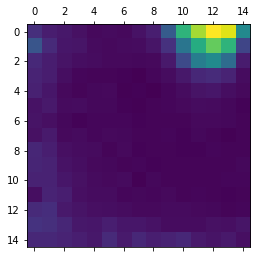

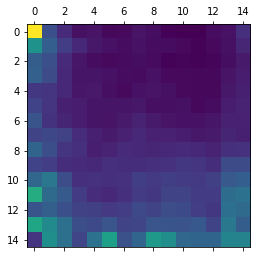

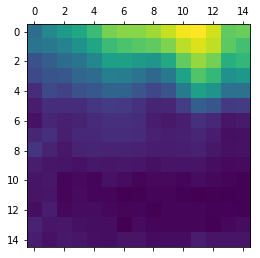

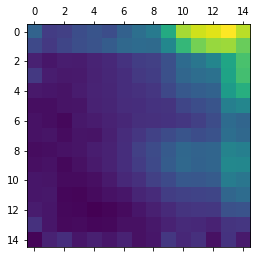

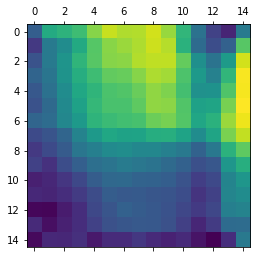

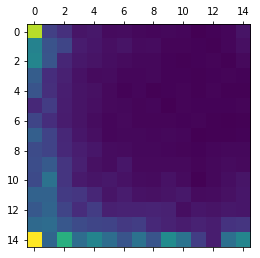

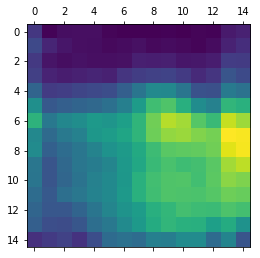

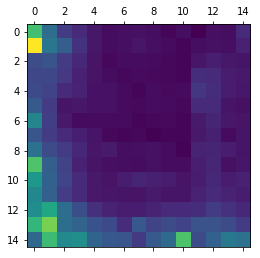

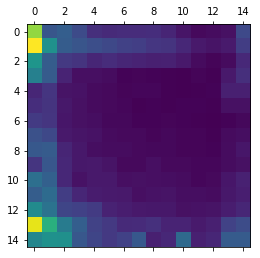

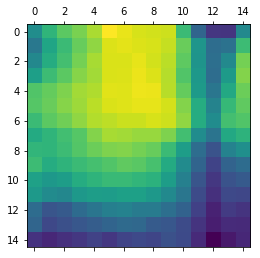

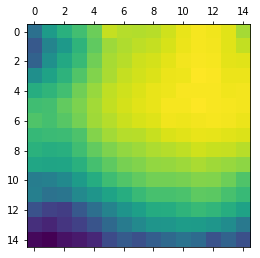

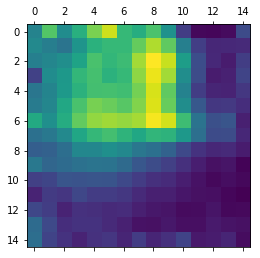

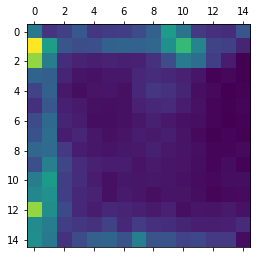

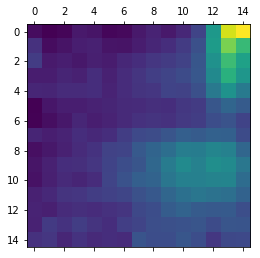

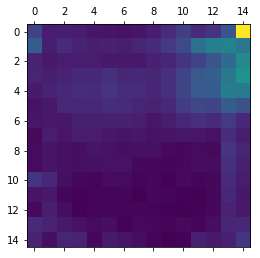

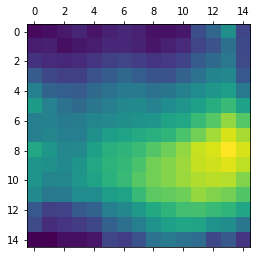

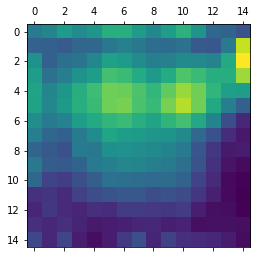

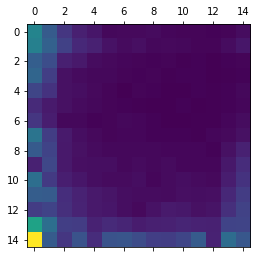

In [18]:
# The single cell receptive field
Grid = np.load('activity_15q/grid__300r.npy')
Grid_shuffle = np.load('activity_15q/grid_shuffle_300r.npy')
Visit = np.load('activity_15q/visit_300r.npy')
Visit_shuffle = np.load('activity_15q/visit_shuffle_300r.npy')
for i in range(70, 90):
    dif = Grid[i]/Visit - Grid_shuffle[i]/Visit_shuffle
    plt.matshow(dif[2:17, 2:17])
#     plt.colorbar()

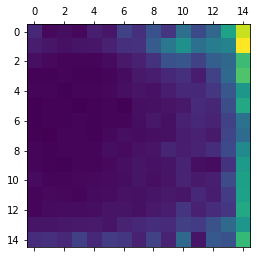

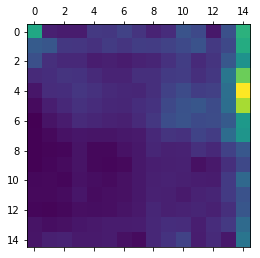

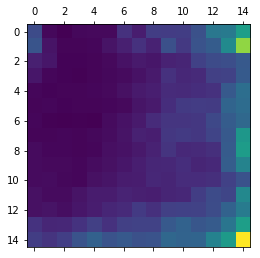

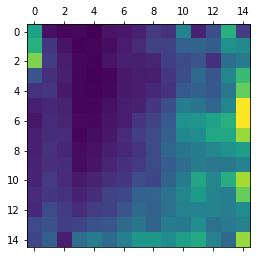

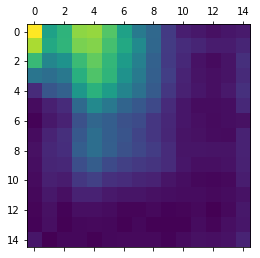

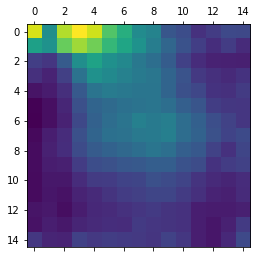

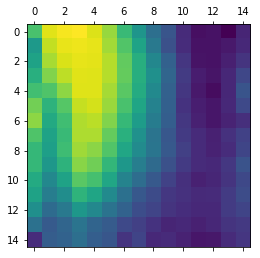

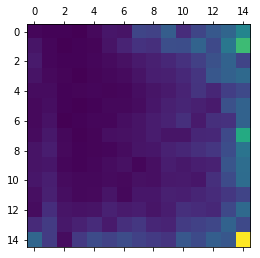

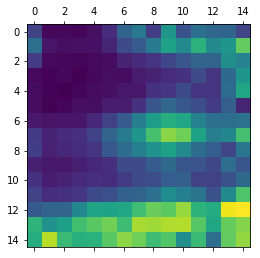

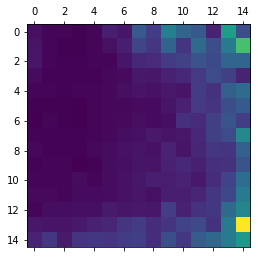

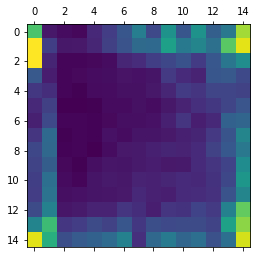

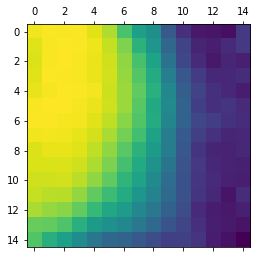

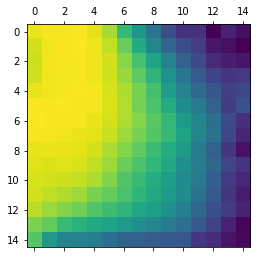

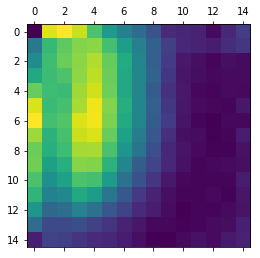

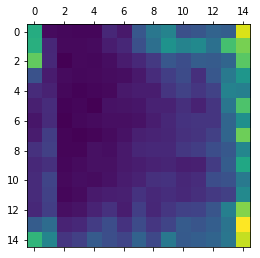

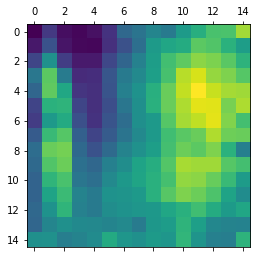

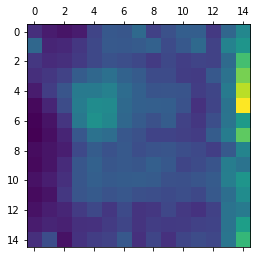

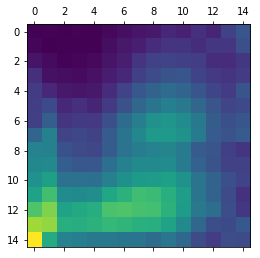

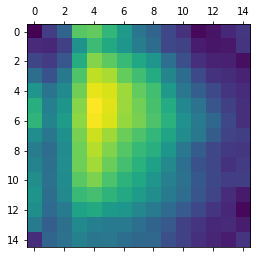

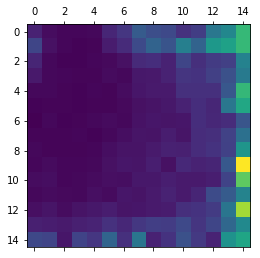

In [19]:
# The single cell receptive field
Grid = np.load('activity_15q/grid__300l.npy')
Grid_shuffle = np.load('activity_15q/grid_shuffle_300l.npy')
Visit = np.load('activity_15q/visit_300l.npy')
Visit_shuffle = np.load('activity_15q/visit_shuffle_300l.npy')
for i in range(70, 90):
    dif = Grid[i]/Visit - Grid_shuffle[i]/Visit_shuffle
    plt.matshow(dif[2:17, 2:17])
#     plt.colorbar()

longer time, there is no pheonmean associate with multi-stability

Here with action feedback, dynamics shift to a totally different regime which is around hopf bifurcation, but it is not hugely shaped by the stimulus

From this graph of PC, we will see that the representation states of trajectory (3,5) and (14,5) are actually qutie close to each other , reflecting symmetry in real space, it is in spirit of predictive decoding, using least number of interal states to play well. 

# Conclusion
**Internal dynamics rather than decoding performance influences more the performance in uncertain enviroments**

**Consider to think in global loops rather than separated system, thus the coupled dynamical system.  This system, which has its genome on its internal weights, will have quite different different pheno-types from the global loops,  richness of internal dynamics turns into extenable phenotypes which supports behaviours across scales.   The different types of attractors, fix point, limit cycle becomes substrate of strategy in different size rooms.  Thus generalization can be done until certain size, which offers complicate behaviour with a "simple mind"**

**The triangle between decoding, dynamics and navigation should be like: 1, dynamics coded by internal weight is most fundamental, it gives rise to different representations(phenotypes).   2,  The relation between decoding and navigation are reciprocal. not random behaviour gives better enviromental prediction(complement the free energy principle) 2,  we should distinguish internal dynamics and global dynamics**